OpenCV represents it as an array of four values : [Next, Previous, First_Child, Parent]
[[[-1 -1  1 -1]
  [ 3 -1  2  0]
  [-1 -1 -1  1]
  [-1  1  4  0]
  [-1 -1  5  3]
  [ 7 -1  6  4]
  [-1 -1 -1  5]
  [-1  5  8  4]
  [-1 -1 -1  7]]]


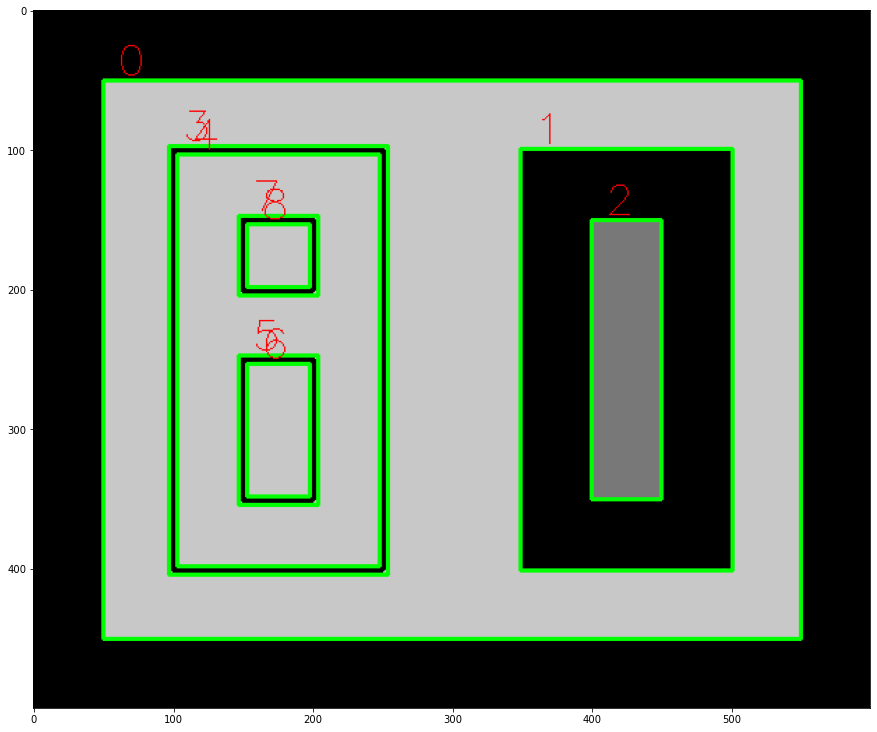

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rup = np.zeros([500,600],dtype=np.uint8)
rup[50:-50,50:-50] = 200
#rup[100:-100,100:250] = 0
cv2.rectangle(rup, (100,100), (250,400), (0,0,255), (3))
rup[100:-100,-250:-100] = 0
#rup[150:200,150:200] = 240
cv2.rectangle(rup, (150,150), (200,200), (0,0,255), (3))
#rup[-250:-150,150:200] = 60
cv2.rectangle(rup, (150,250), (200,350), (0,0,255), (3))
rup[150:-150,-200:-150] = 120
cv2.imwrite('a13c08.png',rup)
image = cv2.imread('a13c08.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


cnts,hierar = cv2.findContours(rup,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(rup, cnts, -1, (0, 255,  0), 2)

print("OpenCV represents it as an array of four values : [Next, Previous, First_Child, Parent]")
print(hierar)

for (i, cnt) in enumerate(cnts):
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(image, "{}".format(i), (int(x) + 10, int(y) - 4), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image)